In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set_context("talk")

In [2]:
df = pd.read_csv('raw/2016-17-ClassCentral-Survey-data-noUserText.csv', decimal=',', encoding = "ISO-8859-1")

In [3]:
selectors = ['Timestamp', '# MOOCs Finished', 'How important is the ability to earn a certificate when you complete a MOOC?']

In [4]:
df_select = df.loc[:, selectors]
df_select.head()

,Timestamp,# MOOCs Finished,How important is the ability to earn a certificate when you complete a MOOC?
0,2016/11/28 11:59:22 AM PST,4.5,1.0
1,2016/12/01 6:45:40 AM PST,0,4.0
2,2016/12/01 6:54:23 AM PST,8,2.0
3,2016/12/01 7:17:09 AM PST,4.5,1.0
4,2016/12/01 7:24:51 AM PST,2.5,2.0


In [5]:
len(df_select)

2491

In [6]:
table = pd.pivot_table(df_select, values = 'Timestamp', index = ['How important is the ability to earn a certificate when you complete a MOOC?'], 
                      columns =['# MOOCs Finished'], aggfunc = lambda x: len(x.unique()))

In [7]:
table

# MOOCs Finished,0,1,15,2.5,25,4.5,8
How important is the ability to earn a certificate when you complete a MOOC?,,,,,,,
1.0,108,44,40,75,36,59,53
2.0,83,48,15,72,13,30,25
3.0,190,63,22,105,30,62,42
4.0,176,62,25,85,26,68,43
5.0,351,83,27,97,34,56,36


In [8]:
table = table[['0', '1', '2.5', '4.5', '8', '15', '25']]
new_table = table.loc[:,:].div(table.sum(axis=0), axis=1).mul(100)

In [9]:
new_table.index

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64', name='How important is the ability to earn a certificate when you complete a MOOC?')

In [10]:
#sns.heatmap(new_table.iloc[::-1], annot=True, fmt='2.0f', cbar = False, cmap="Greens")
sns.heatmap(new_table.iloc[[4, 0], :], annot=True, fmt='2.0f', cbar = False, cmap="Greens")

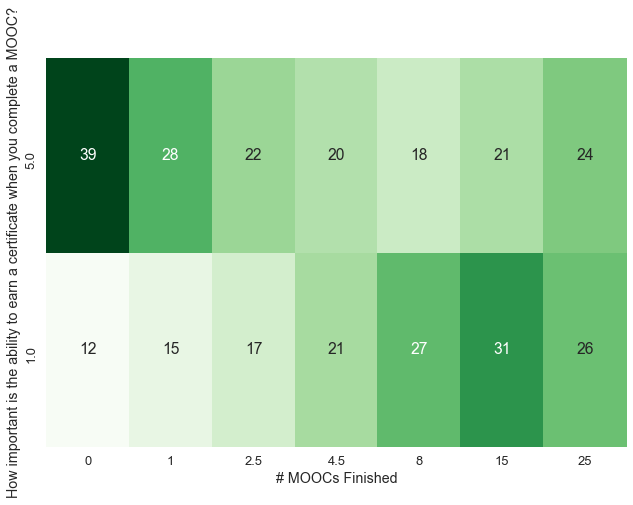

In [11]:
plt.show()